### 导论Homework6
#### 10235501435张凯诚

##### 1.读取data中2023_6文件夹中的openrank数据集，分析美国排名前一百的项目的的value的最大值、最小值、均值以及中位数。

In [6]:
import pandas as pd
data_path=r'c:\Users\Lenovo\Desktop\大二\大二上\导论\data\2023_6\open_rank_20236.csv'
df=pd.read_csv(data_path)
us_top_100=df[df['rank']<=100]
max_value=us_top_100['value'].max()
min_value=us_top_100['value'].min()
mean_value=us_top_100['value'].mean()
median_value=us_top_100['value'].median()
print(f"美国排名前一百的项目的 value 最大值为：{max_value}")
print(f"美国排名前一百的项目的 value 最小值为：{min_value}")
print(f"美国排名前一百的项目的 value 均值为：{mean_value}")
print(f"美国排名前一百的项目的 value 中位数为：{median_value}")


美国排名前一百的项目的 value 最大值为：1394.45
美国排名前一百的项目的 value 最小值为：200.68
美国排名前一百的项目的 value 均值为：346.9679
美国排名前一百的项目的 value 中位数为：273.66999999999996


##### 2.读取data中2022文件夹下的activity_2020文件，分析美国排名前十的项目的平均增长率。

In [5]:
import pandas as pd
file_path=r'C:\Users\Lenovo\Desktop\大二\大二上\导论\data\2022\activity_2022.csv'
df=pd.read_csv(file_path)
us_top_10=df.iloc[1:11]
def calculate_growth_rate(row):
    values = row[1:]
    return (values.iloc[11] - values.iloc[0]) / values.iloc[0]
growth_rates = us_top_10.apply(calculate_growth_rate, axis=1)
average_growth_rate = growth_rates.mean()

print(f"美国排名前十项目的平均增长率为：{average_growth_rate*100:.2f}%")


美国排名前十项目的平均增长率为：-2.85%


##### 3.data/2022/china_2022.csv表示中国开源领域排名前十的企业。data/2022/global_2022.csv表示开源领域全球前十的的企业，请通过各种统计指标比较两者的各种数据差异。

In [ ]:
import pandas as pd

china_file_path = r'C:\Users\Lenovo\Desktop\大二\大二上\导论\data\2022\china_2022.csv'
global_file_path = r'C:\Users\Lenovo\Desktop\大二\大二上\导论\data\2022\global_2022.csv'
china_df = pd.read_csv(china_file_path)
global_df = pd.read_csv(global_file_path)
# 比较基本统计信息
print("中国企业数据基本统计信息：")
print(china_df.describe())
print("\n全球企业数据基本统计信息：")
print(global_df.describe())
# 均值差异
for column in china_df.columns[1:]:  # 排除 name 列
    china_mean = china_df[column].mean()
    global_mean = global_df[column].mean()
    print(f"{column}的均值差异：中国企业均值为{china_mean}，全球企业均值为{global_mean}")
# 中位数差异
for column in china_df.columns[1:]:
    china_median = china_df[column].median()
    global_median = global_df[column].median()
    print(f"{column}的中位数差异：中国企业中位数为{china_median}，全球企业中位数为{global_median}")

# 标准差差异
for column in china_df.columns[1:]:
    china_std = china_df[column].std()
    global_std = global_df[column].std()
    print(f"{column}的标准差差异：中国企业标准差为{china_std}，全球企业标准差为{global_std}")

中国企业数据基本统计信息：
       issue_comment    open_issue     open_pull  review_comment  \
count      10.000000     10.000000     10.000000        10.00000   
mean    61205.500000   9169.200000  16912.700000     19857.50000   
std     49332.487917   6810.653563  10068.922805     21115.07349   
min     11741.000000    752.000000   1823.000000      2113.00000   
25%     30943.500000   4625.250000   9376.750000      3120.00000   
50%     39141.000000   6889.500000  15953.000000     10851.00000   
75%     82179.500000  14225.500000  22483.250000     31507.75000   
max    167814.000000  22397.000000  35266.000000     60402.00000   

        merged_pull      rank         value  rankDelta    valueDelta  
count     10.000000  10.00000      10.00000  10.000000     10.000000  
mean   13764.100000   5.50000   40269.53400   5.300000   9265.007000  
std     7692.752064   3.02765   30905.17181   9.944848   5327.824003  
min     1165.000000   1.00000   12033.71000   0.000000   2329.360000  
25%     8067.25000

##### 4.贝叶斯定理

贝叶斯定理参考：https://zh.wikipedia.org/wiki/%E8%B4%9D%E5%8F%B6%E6%96%AF%E5%AE%9A%E7%90%86

根据 OpenLeaderboard 上对前 10000 个活跃的项目统计，工具组件型项目占比 50 %，系统应用型占比 25 %，而内容资源型（非软件类）项目占比 25 %，成三分天下的态势。

非软件类项目中，带有 HTML/Markdown 标签的项目占 85 %，而软件类项目中带 HTML/Markdown标签的项目占比则为 10 %（注：HTML/Markdown 一般可用来书写文档内容）

工具组件型项目中，JavaScript 语言的项目占比 35 %，而非工具组件型项目中， JavaScript 语言的项目占比则为 10 %（注：JavaScript 是一种脚本编程语言，可以在网页上实现复杂的功能）

已知一个项目带有 HTML/Markdown 标签，那么该项目是非软件型项目的概率是多少？

In [19]:
software_non_type_percentage = 0.25
html_markdown_in_non_software_percentage = 0.85
software_type_percentage = 0.75
html_markdown_in_software_percentage = 0.1

# 计算 P(B)
P_B = software_type_percentage * html_markdown_in_software_percentage + software_non_type_percentage * html_markdown_in_non_software_percentage

# 计算 P(A|B)
P_A_given_B = (html_markdown_in_non_software_percentage * software_non_type_percentage) / P_B

print(f"已知一个项目带有 HTML/Markdown 标签，该项目是非软件型项目的概率是：{P_A_given_B*100:.2f}%")

已知一个项目带有 HTML/Markdown 标签，该项目是非软件型项目的概率是：73.91%


##### 5.接上文，已知一个项目是由 JavaScript 语言编写的，那么它是工具组件型项目的概率是多少？

In [20]:
tool_component_type_percentage = 0.5
javascript_in_tool_component_percentage = 0.35
non_tool_component_type_percentage = 0.5
javascript_in_non_tool_component_percentage = 0.1

# 计算 P(B)
P_B = tool_component_type_percentage * javascript_in_tool_component_percentage + non_tool_component_type_percentage * javascript_in_non_tool_component_percentage

# 计算 P(A|B)
P_A_given_B = (javascript_in_tool_component_percentage * tool_component_type_percentage) / P_B

print(f"已知一个项目是由 JavaScript 语言编写的，它是工具组件型项目的概率是：{P_A_given_B*100:.2f}%")

已知一个项目是由 JavaScript 语言编写的，它是工具组件型项目的概率是：77.78%


##### 6.根据以下数据建立可视化无向图

user = [1, 2, 3, 4]

edge = [(1, 2), (2, 3), (3, 4), (4, 1)]

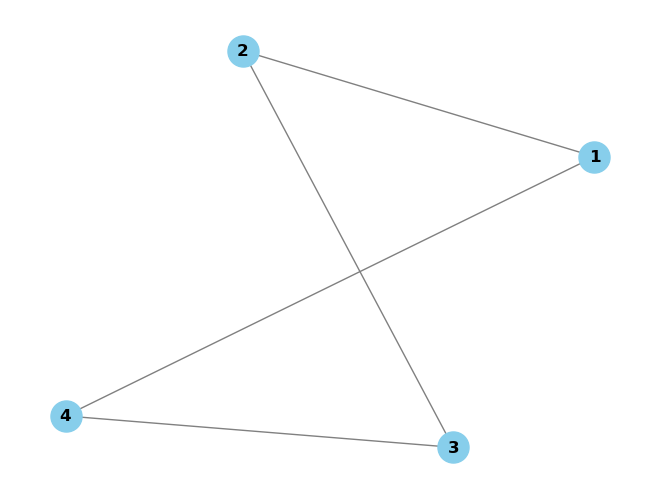

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

users = [1, 2, 3, 4]
edges = [(1, 2), (2, 3), (3, 4), (4, 1)]

G = nx.Graph()
G.add_nodes_from(users)
G.add_edges_from(edges)

nx.draw(G, with_labels=True, node_size=500, node_color='skyblue', font_size=12, font_weight='bold', edge_color='gray')
plt.show()

##### 7.根据以下数据建立可视化有向图

users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1), (1, 3), (2, 3), (3, 4), (5, 4), (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

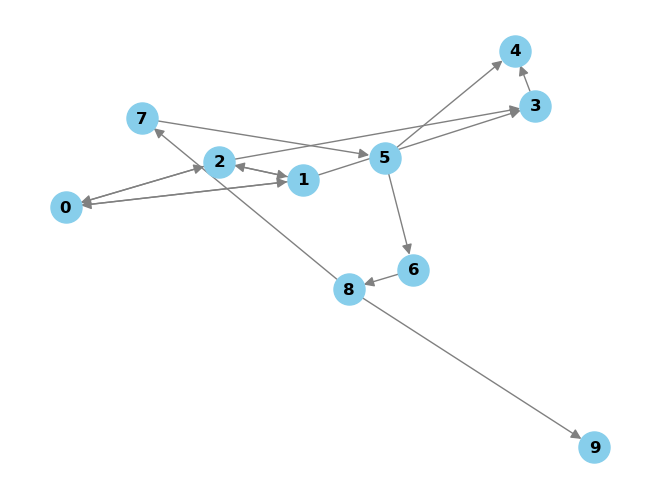

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1), (1, 3), (2, 3), (3, 4), (5, 4), (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

G = nx.DiGraph()
G.add_nodes_from(users)
G.add_edges_from(edges)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=12, font_weight='bold', arrowsize=15, edge_color='gray')
plt.show()

##### 8.针对第七题构建的有向图，计算并输出每个节点的pagerank值。同时根据pagerank调整可视化图的大小，使得PageRank越大的节点在可视化结果中也越大。 pageRank算法原理：https://zh.wikipedia.org/wiki/PageRank

Node 0: PageRank = 0.0950
Node 1: PageRank = 0.1055
Node 2: PageRank = 0.1055
Node 3: PageRank = 0.0950
Node 4: PageRank = 0.1593
Node 5: PageRank = 0.1020
Node 6: PageRank = 0.0786
Node 7: PageRank = 0.0786
Node 8: PageRank = 0.1020
Node 9: PageRank = 0.0786


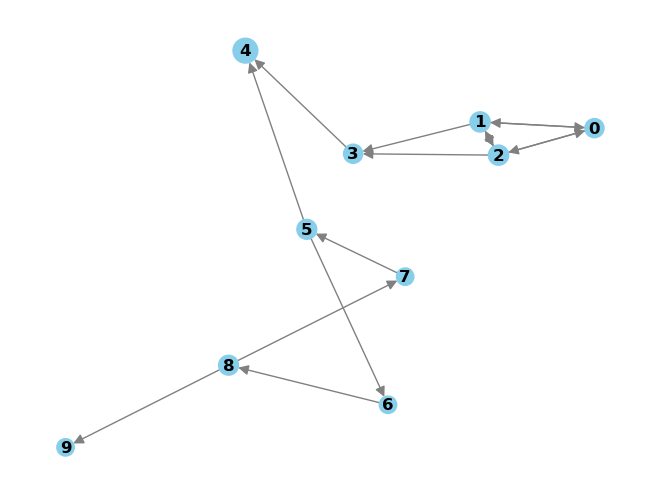

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1), (1, 3), (2, 3), (3, 4), (5, 4), (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

G = nx.DiGraph()
G.add_nodes_from(users)
G.add_edges_from(edges)

pageranks = nx.pagerank(G)

# 根据 PageRank 值调整节点大小
node_sizes = [pageranks[node] * 2000 for node in G.nodes()]

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=node_sizes, node_color='skyblue', font_size=12, font_weight='bold', arrowsize=15, edge_color='gray')

# 输出每个节点的 PageRank 值
for node, pr in pageranks.items():
    print(f"Node {node}: PageRank = {pr:.4f}")

plt.show()